# Demonstration of how to operate sphericalized X22 model

In [1]:
import numpy as np
from radmc.spherical_x22 import *

## Generate opacity table and disk property table

In [2]:
maximum_grain_size  = 0.1 # mm
power_law_index_q   = -3.5
d_to_g_ratio        = 0.01

In [3]:
opacity_table = generate_opacity_table_opt(
    a_min=1e-6, a_max=maximum_grain_size*0.1, # X22 adopts cgs units
    q=power_law_index_q, dust_to_gas=d_to_g_ratio,
    save_table=False
)
disk_property_table = generate_disk_property_table(opacity_table=opacity_table)

## Initialize sphericalized X22 model

In [4]:
DM_shperical = DiskModel_spherical(
    opacity_table=opacity_table, 
    disk_property_table=disk_property_table
)

In [5]:
mstar   = 0.1 * Msun # Mass of the central protostar
mdot    = 1e-6 * Msun / yr # Rate of mass infall from the envelope onto the disk
Rd      = 60 * au # Disk radius
Q       = 0.5 # Toomre index
NR      = 200 # Number of grid points in the radial direction
Ntheta  = 400 # Number of grid points in the theta direction
Nphi    = 10 # Number of grid points in the phi direction

In [6]:
DM_shperical.input_disk_parameter(
    Mstar=mstar, 
    Mdot=mdot, 
    Rd=Rd, 
    Q=Q,
    N_R=NR
)
DM_shperical.extend_to_spherical(NTheta=Ntheta, NPhi=Nphi)

## Check the sizes of grids and each disk profile

In [7]:
r_grid          = DM_shperical.r_sph # in au
r_grid_boundary = DM_shperical.r_sph_grid # in cm

print("size of r_grid: ", r_grid.shape)
print("size of r_grid_boundary: ", r_grid_boundary.shape)
# print("r_grid: ", r_grid)
# print("r_grid_boundary: ", r_grid_boundary/au)

size of r_grid:  (200,)
size of r_grid_boundary:  (201,)


In [8]:
theta_grid        = DM_shperical.theta_sph # in rad
theta_grid_boundary = DM_shperical.theta_sph_grid # in rad
print("size of theta_grid: ", theta_grid.shape)
print("size of theta_grid_boundary: ", theta_grid_boundary.shape)
# print(np.rad2deg(theta_grid))
# print(np.rad2deg(theta_grid_boundary))

size of theta_grid:  (400,)
size of theta_grid_boundary:  (401,)


In [9]:
phi_grid_boundary = DM_shperical.phi_sph_grid # in rad
print("size of phi_grid_boundary: ", phi_grid_boundary.shape)

size of phi_grid_boundary:  (11,)


In [10]:
density = DM_shperical.rho_sph
print(density.shape)

(200, 400, 10)


In [11]:
temperature = DM_shperical.T_sph
print(temperature.shape)

(200, 400, 10)


[]

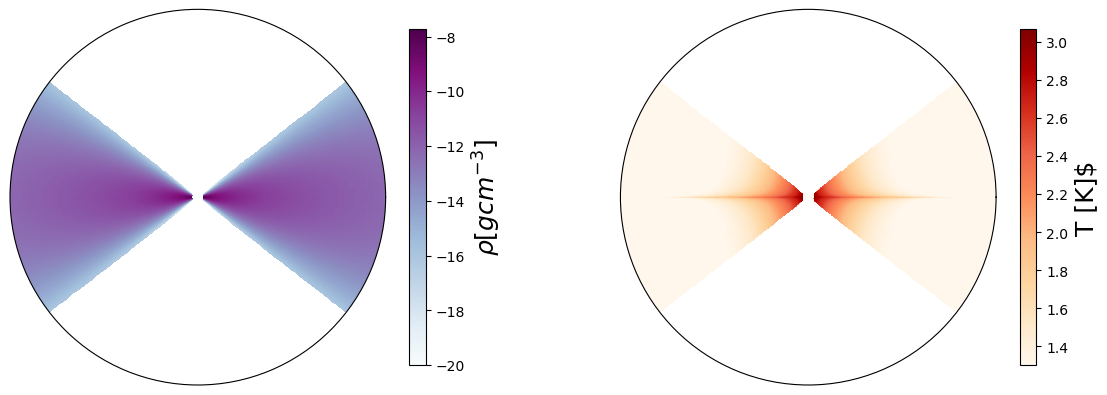

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), subplot_kw={'projection': 'polar'})
fig.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1, wspace=0.3, hspace=0.05)

c = ax[0].pcolormesh(theta_grid-np.pi/2, r_grid, np.log10(density[:,:,0]), shading='auto', cmap='BuPu')
ax[0].pcolormesh(theta_grid+np.pi/2, r_grid, np.log10(density[:,:,0]), shading='auto', cmap='BuPu')
fig.colorbar(c, ax=ax[0], orientation='vertical', shrink=0.7).set_label(r'$\rho [gcm^{-3}]$', fontsize=18)
ax[0].set_xticks([])
ax[0].set_yticks([])

c = ax[1].pcolormesh(theta_grid-np.pi/2, r_grid, np.log10(temperature[:,:,0]), shading='auto', cmap='OrRd')
ax[1].pcolormesh(theta_grid+np.pi/2, r_grid, np.log10(temperature[:,:,0]), shading='auto', cmap='OrRd')
fig.colorbar(c, ax=ax[1], orientation='vertical', shrink=0.7).set_label(r'T [K]$', fontsize=18)
ax[1].set_xticks([])
ax[1].set_yticks([])